<a href="https://colab.research.google.com/github/yopiazani02/yopiazani02.github.io/blob/master/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**19917019 - Yopi Azani**

**Data Sebelum di Preprocessing**

In [4]:
#membaca data file dari gdrive
with open("/content/drive/My Drive/dataset/tweet-data.txt", "r") as file:
    data = file.read()
#menampilkan data    
data

"Siang, bisa langsung ditanyakan ke Kebidanan FK UB. Terima kasih. https://t.co/5P0KDHlK9r\nJadwal Kegiatan Dies Natalis ke-54 UB. Catat tanggalnya dan semarakkan acaranya. https://t.co/YZpBV1YFJK\nComing soon : Rangkaian Acara Dies Natalis ke-54 Universitas Brawijaya https://t.co/5xgu0Gj828\nRT @UB_IO: Beasiswa AMINEF Untuk Pengajar Bahasa Inggris di UB. Deadline aplikasi tanggal 15 April 2017 https://t.co/Kg5Ked96bf @UB_Official\nRT @UB_IO: Beasiswa untuk Training dan Studi Lanjut ke Belgia. @UB_Official @UBTV_Brawijaya https://t.co/eEHYiNzbrf\nRT @UB_IT: Periksa Soal: cek jawaban kamu.Untuk kembali ke soal,klik nomornya.Tombol SELESAI di klik jika semua soal sudah dijawab &amp; nilai…\nRT @UB_IT: Tes kompetensi TI selama 90 menit/90 soal (30 Excel,30 P.Point,30 Word). Soal tiap orang berbeda krn bank soal lebih dari 3000.…\nRT @UnileverIDN: Prosesi penutupan Bulan Kesehatan Gigi Nasional 2016 di FKG Univ Brawijaya #BKGN #Pepsodent @UB_Official @TanyaPepsodent @…\nSelamat siang. Untu

In [5]:
#membagi kata per kata
datasplit = data.split()
#menampikan data hasil split
datasplit

['Siang,',
 'bisa',
 'langsung',
 'ditanyakan',
 'ke',
 'Kebidanan',
 'FK',
 'UB.',
 'Terima',
 'kasih.',
 'https://t.co/5P0KDHlK9r',
 'Jadwal',
 'Kegiatan',
 'Dies',
 'Natalis',
 'ke-54',
 'UB.',
 'Catat',
 'tanggalnya',
 'dan',
 'semarakkan',
 'acaranya.',
 'https://t.co/YZpBV1YFJK',
 'Coming',
 'soon',
 ':',
 'Rangkaian',
 'Acara',
 'Dies',
 'Natalis',
 'ke-54',
 'Universitas',
 'Brawijaya',
 'https://t.co/5xgu0Gj828',
 'RT',
 '@UB_IO:',
 'Beasiswa',
 'AMINEF',
 'Untuk',
 'Pengajar',
 'Bahasa',
 'Inggris',
 'di',
 'UB.',
 'Deadline',
 'aplikasi',
 'tanggal',
 '15',
 'April',
 '2017',
 'https://t.co/Kg5Ked96bf',
 '@UB_Official',
 'RT',
 '@UB_IO:',
 'Beasiswa',
 'untuk',
 'Training',
 'dan',
 'Studi',
 'Lanjut',
 'ke',
 'Belgia.',
 '@UB_Official',
 '@UBTV_Brawijaya',
 'https://t.co/eEHYiNzbrf',
 'RT',
 '@UB_IT:',
 'Periksa',
 'Soal:',
 'cek',
 'jawaban',
 'kamu.Untuk',
 'kembali',
 'ke',
 'soal,klik',
 'nomornya.Tombol',
 'SELESAI',
 'di',
 'klik',
 'jika',
 'semua',
 'soal',
 'sudah'

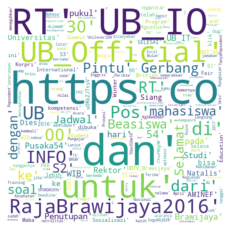

In [6]:
#melihat frekuensi data menggunakan wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 500,
                      height = 500,
                      max_font_size=100, 
                      max_words=200, 
                      background_color="white").generate(str(datasplit))
plt.figure()
plt.imshow(wordcloud,
           interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
#membuat list data dan jumlah frekusensi kemunculannya
import collections
import itertools

# Create counter
counts_no_urls = collections.Counter(datasplit)
#menampikan 20 data teratas
counts_no_urls.most_common(20)

[('dan', 17),
 ('RT', 17),
 ('@UB_IO:', 12),
 ('@UB_Official', 9),
 ('#RajaBrawijaya2016', 8),
 ('di', 7),
 (':', 6),
 ('untuk', 6),
 ('Pos', 6),
 ('dari', 5),
 ('#INFO', 5),
 ('Pintu', 5),
 ('ke', 4),
 ('UB.', 4),
 ('S2', 4),
 ('Gerbang', 4),
 ('Brawijaya', 3),
 ('Beasiswa', 3),
 ('@UB_IT:', 3),
 ('soal', 3)]

In [8]:
import pandas as pd
#membuat data frame dari hasil perhitungan jumlah kata di atas
df = pd.DataFrame(counts_no_urls.most_common(20),
                             columns=['words', 'count'])

df

,words,count
0,dan,17
1,RT,17
2,@UB_IO:,12
3,@UB_Official,9
4,#RajaBrawijaya2016,8
5,di,7
6,:,6
7,untuk,6
8,Pos,6
9,dari,5


**Data sesudah di preprocessing**

In [0]:
import re, string, unicodedata

In [10]:
#proses menghilangkan url
removeUrl = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))',
             '',
             data)
removeUrl

"Siang, bisa langsung ditanyakan ke Kebidanan FK UB. Terima kasih. \nJadwal Kegiatan Dies Natalis ke-54 UB. Catat tanggalnya dan semarakkan acaranya. \nComing soon : Rangkaian Acara Dies Natalis ke-54 Universitas Brawijaya \nRT @UB_IO: Beasiswa AMINEF Untuk Pengajar Bahasa Inggris di UB. Deadline aplikasi tanggal 15 April 2017  @UB_Official\nRT @UB_IO: Beasiswa untuk Training dan Studi Lanjut ke Belgia. @UB_Official @UBTV_Brawijaya \nRT @UB_IT: Periksa Soal: cek jawaban kamu.Untuk kembali ke soal,klik nomornya.Tombol SELESAI di klik jika semua soal sudah dijawab &amp; nilai…\nRT @UB_IT: Tes kompetensi TI selama 90 menit/90 soal (30 Excel,30 P.Point,30 Word). Soal tiap orang berbeda krn bank soal lebih dari 3000.…\nRT @UnileverIDN: Prosesi penutupan Bulan Kesehatan Gigi Nasional 2016 di FKG Univ Brawijaya #BKGN #Pepsodent @UB_Official @TanyaPepsodent @…\nSelamat siang. Untuk jadwal penerimaan mahasiswa S2 bisa dilihat di  atau di… \nRT @kempanrb: bersama Korpri meneguhkan netralitas dan

In [11]:
#merubah semua kata menjadi huruf kecil
lowerCase = removeUrl.lower()
lowerCase

"siang, bisa langsung ditanyakan ke kebidanan fk ub. terima kasih. \njadwal kegiatan dies natalis ke-54 ub. catat tanggalnya dan semarakkan acaranya. \ncoming soon : rangkaian acara dies natalis ke-54 universitas brawijaya \nrt @ub_io: beasiswa aminef untuk pengajar bahasa inggris di ub. deadline aplikasi tanggal 15 april 2017  @ub_official\nrt @ub_io: beasiswa untuk training dan studi lanjut ke belgia. @ub_official @ubtv_brawijaya \nrt @ub_it: periksa soal: cek jawaban kamu.untuk kembali ke soal,klik nomornya.tombol selesai di klik jika semua soal sudah dijawab &amp; nilai…\nrt @ub_it: tes kompetensi ti selama 90 menit/90 soal (30 excel,30 p.point,30 word). soal tiap orang berbeda krn bank soal lebih dari 3000.…\nrt @unileveridn: prosesi penutupan bulan kesehatan gigi nasional 2016 di fkg univ brawijaya #bkgn #pepsodent @ub_official @tanyapepsodent @…\nselamat siang. untuk jadwal penerimaan mahasiswa s2 bisa dilihat di  atau di… \nrt @kempanrb: bersama korpri meneguhkan netralitas dan

In [20]:
#menghilangkan whitespice dan punctuations
clean = re.sub(r'[^\w]|_',' ',lowerCase)
clean = re.sub('[\s]+', ' ', clean)
#menghilangkan digit dari kata
clean = re.sub("\S*\d\S*", "", clean).strip()
#menghilangkan digit atau nomor
clean = re.sub(r"\b\d+\b", " ", clean)
clean

'siang bisa langsung ditanyakan ke kebidanan fk ub terima kasih jadwal kegiatan dies natalis ke  ub catat tanggalnya dan semarakkan acaranya coming soon rangkaian acara dies natalis ke  universitas brawijaya rt ub io beasiswa aminef untuk pengajar bahasa inggris di ub deadline aplikasi tanggal  april  ub official rt ub io beasiswa untuk training dan studi lanjut ke belgia ub official ubtv brawijaya rt ub it periksa soal cek jawaban kamu untuk kembali ke soal klik nomornya tombol selesai di klik jika semua soal sudah dijawab amp nilai rt ub it tes kompetensi ti selama  menit  soal  excel  p point  word soal tiap orang berbeda krn bank soal lebih dari  rt unileveridn prosesi penutupan bulan kesehatan gigi nasional  di fkg univ brawijaya bkgn pepsodent ub official tanyapepsodent selamat siang untuk jadwal penerimaan mahasiswa  bisa dilihat di atau di rt kempanrb bersama korpri meneguhkan netralitas dan meningkatkan profesionalisme aparatur sipil negara selamat hut korpri ke  https rt ub i

In [21]:
#remove non-ascii
removeNonascii = unicodedata.normalize('NFKD', clean).encode('ascii', 'ignore').decode('utf-8', 'ignore')
removeNonascii

'siang bisa langsung ditanyakan ke kebidanan fk ub terima kasih jadwal kegiatan dies natalis ke  ub catat tanggalnya dan semarakkan acaranya coming soon rangkaian acara dies natalis ke  universitas brawijaya rt ub io beasiswa aminef untuk pengajar bahasa inggris di ub deadline aplikasi tanggal  april  ub official rt ub io beasiswa untuk training dan studi lanjut ke belgia ub official ubtv brawijaya rt ub it periksa soal cek jawaban kamu untuk kembali ke soal klik nomornya tombol selesai di klik jika semua soal sudah dijawab amp nilai rt ub it tes kompetensi ti selama  menit  soal  excel  p point  word soal tiap orang berbeda krn bank soal lebih dari  rt unileveridn prosesi penutupan bulan kesehatan gigi nasional  di fkg univ brawijaya bkgn pepsodent ub official tanyapepsodent selamat siang untuk jadwal penerimaan mahasiswa  bisa dilihat di atau di rt kempanrb bersama korpri meneguhkan netralitas dan meningkatkan profesionalisme aparatur sipil negara selamat hut korpri ke  https rt ub i

In [22]:
#remove \n
removeNewLine = removeNonascii.replace("\n", "")
removeNewLine

'siang bisa langsung ditanyakan ke kebidanan fk ub terima kasih jadwal kegiatan dies natalis ke  ub catat tanggalnya dan semarakkan acaranya coming soon rangkaian acara dies natalis ke  universitas brawijaya rt ub io beasiswa aminef untuk pengajar bahasa inggris di ub deadline aplikasi tanggal  april  ub official rt ub io beasiswa untuk training dan studi lanjut ke belgia ub official ubtv brawijaya rt ub it periksa soal cek jawaban kamu untuk kembali ke soal klik nomornya tombol selesai di klik jika semua soal sudah dijawab amp nilai rt ub it tes kompetensi ti selama  menit  soal  excel  p point  word soal tiap orang berbeda krn bank soal lebih dari  rt unileveridn prosesi penutupan bulan kesehatan gigi nasional  di fkg univ brawijaya bkgn pepsodent ub official tanyapepsodent selamat siang untuk jadwal penerimaan mahasiswa  bisa dilihat di atau di rt kempanrb bersama korpri meneguhkan netralitas dan meningkatkan profesionalisme aparatur sipil negara selamat hut korpri ke  https rt ub i

In [23]:
#removing mentions 
removeMentions = re.sub(r':', '', removeNewLine)
removeMentions = re.sub(r'‚@', '', removeMentions)
removeMentions = re.sub('@[^\s]+','',removeMentions)
removeMentions

'siang bisa langsung ditanyakan ke kebidanan fk ub terima kasih jadwal kegiatan dies natalis ke  ub catat tanggalnya dan semarakkan acaranya coming soon rangkaian acara dies natalis ke  universitas brawijaya rt ub io beasiswa aminef untuk pengajar bahasa inggris di ub deadline aplikasi tanggal  april  ub official rt ub io beasiswa untuk training dan studi lanjut ke belgia ub official ubtv brawijaya rt ub it periksa soal cek jawaban kamu untuk kembali ke soal klik nomornya tombol selesai di klik jika semua soal sudah dijawab amp nilai rt ub it tes kompetensi ti selama  menit  soal  excel  p point  word soal tiap orang berbeda krn bank soal lebih dari  rt unileveridn prosesi penutupan bulan kesehatan gigi nasional  di fkg univ brawijaya bkgn pepsodent ub official tanyapepsodent selamat siang untuk jadwal penerimaan mahasiswa  bisa dilihat di atau di rt kempanrb bersama korpri meneguhkan netralitas dan meningkatkan profesionalisme aparatur sipil negara selamat hut korpri ke  https rt ub i

In [24]:
dataCleaning = removeMentions.split()
dataCleaning

['siang',
 'bisa',
 'langsung',
 'ditanyakan',
 'ke',
 'kebidanan',
 'fk',
 'ub',
 'terima',
 'kasih',
 'jadwal',
 'kegiatan',
 'dies',
 'natalis',
 'ke',
 'ub',
 'catat',
 'tanggalnya',
 'dan',
 'semarakkan',
 'acaranya',
 'coming',
 'soon',
 'rangkaian',
 'acara',
 'dies',
 'natalis',
 'ke',
 'universitas',
 'brawijaya',
 'rt',
 'ub',
 'io',
 'beasiswa',
 'aminef',
 'untuk',
 'pengajar',
 'bahasa',
 'inggris',
 'di',
 'ub',
 'deadline',
 'aplikasi',
 'tanggal',
 'april',
 'ub',
 'official',
 'rt',
 'ub',
 'io',
 'beasiswa',
 'untuk',
 'training',
 'dan',
 'studi',
 'lanjut',
 'ke',
 'belgia',
 'ub',
 'official',
 'ubtv',
 'brawijaya',
 'rt',
 'ub',
 'it',
 'periksa',
 'soal',
 'cek',
 'jawaban',
 'kamu',
 'untuk',
 'kembali',
 'ke',
 'soal',
 'klik',
 'nomornya',
 'tombol',
 'selesai',
 'di',
 'klik',
 'jika',
 'semua',
 'soal',
 'sudah',
 'dijawab',
 'amp',
 'nilai',
 'rt',
 'ub',
 'it',
 'tes',
 'kompetensi',
 'ti',
 'selama',
 'menit',
 'soal',
 'excel',
 'p',
 'point',
 'word',
 

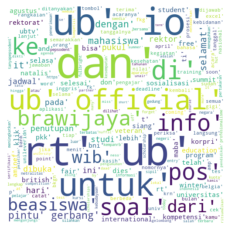

In [25]:
wordcloud = WordCloud(width = 500,
                      height = 500,
                      max_font_size=100, 
                      max_words=200, 
                      background_color="white").generate(str(dataCleaning))
plt.figure()
plt.imshow(wordcloud,
           interpolation="bilinear")
plt.axis("off")
plt.show()

**Setelah stopword**

In [26]:
#import nltk dan download stop word
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
#manggil stopword indonesia
stop_words = set(stopwords.words('indonesian'))

# View a few words from the set
list(stop_words)[0:10]

['tentulah',
 'dibuatnya',
 'berjumlah',
 'dimungkinkan',
 'didapat',
 'diminta',
 'keseluruhan',
 'antar',
 'dipastikan',
 'hari']

In [28]:
afterStopword = [word for word in dataCleaning if not word in stop_words]  
afterStopword

['siang',
 'langsung',
 'kebidanan',
 'fk',
 'ub',
 'terima',
 'kasih',
 'jadwal',
 'kegiatan',
 'dies',
 'natalis',
 'ub',
 'catat',
 'tanggalnya',
 'semarakkan',
 'acaranya',
 'coming',
 'soon',
 'rangkaian',
 'acara',
 'dies',
 'natalis',
 'universitas',
 'brawijaya',
 'rt',
 'ub',
 'io',
 'beasiswa',
 'aminef',
 'pengajar',
 'bahasa',
 'inggris',
 'ub',
 'deadline',
 'aplikasi',
 'tanggal',
 'april',
 'ub',
 'official',
 'rt',
 'ub',
 'io',
 'beasiswa',
 'training',
 'studi',
 'belgia',
 'ub',
 'official',
 'ubtv',
 'brawijaya',
 'rt',
 'ub',
 'it',
 'periksa',
 'cek',
 'klik',
 'nomornya',
 'tombol',
 'selesai',
 'klik',
 'amp',
 'nilai',
 'rt',
 'ub',
 'it',
 'tes',
 'kompetensi',
 'ti',
 'menit',
 'excel',
 'p',
 'point',
 'word',
 'orang',
 'berbeda',
 'krn',
 'bank',
 'rt',
 'unileveridn',
 'prosesi',
 'penutupan',
 'kesehatan',
 'gigi',
 'nasional',
 'fkg',
 'univ',
 'brawijaya',
 'bkgn',
 'pepsodent',
 'ub',
 'official',
 'tanyapepsodent',
 'selamat',
 'siang',
 'jadwal',
 '

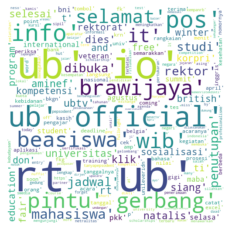

In [29]:
wordcloud = WordCloud(width = 500,
                      height = 500,
                      max_font_size=100, 
                      max_words=200, 
                      background_color="white").generate(str(afterStopword))
plt.figure()
plt.imshow(wordcloud,
           interpolation="bilinear")
plt.axis("off")
plt.show()